# Flight Price Prediction

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('Clean_Dataset.csv')


In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop(['Unnamed: 0','flight'],axis='columns',inplace=True)

In [5]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
final=df

## Outlier detection and removal of it

In [7]:
final.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [8]:
# price is getting effected by airline	source_city destination_city	class so we need to remove the outliers
# as we cant remove by col we remove by each class uch as for economy outliers, spice hjet outliers thus group by used
def remove_pps_outliers(df,s):
    df_output=pd.DataFrame()
    for key,subdf in final.groupby(s):
        m=np.mean(subdf.price)
        st=np.std(subdf.price)
        # mean - std theke choto and mean + st boro gulo outliers so we are removing them
        reduced_df=subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_output=pd.concat([df_output,reduced_df], ignore_index=True)
    return df_output

In [9]:
# removing outlier for these cols
f1=remove_pps_outliers(final,'airline')
f2=remove_pps_outliers(f1,'source_city')
f3=remove_pps_outliers(f2,'destination_city')
f4=remove_pps_outliers(f3,'class')

In [10]:
final=f4

In [11]:
len(final)


223076

In [12]:
final.shape

(223076, 10)

In [13]:
final.describe()

,duration,days_left,price
count,223076.000000,223076.000000,223076.000000
mean,12.685891,27.668848,20029.357111
std,6.913779,12.778497,22116.212370
min,0.830000,1.000000,2832.000000
25%,7.420000,18.000000,4792.000000
50%,11.670000,28.000000,6461.000000
75%,16.500000,39.000000,45693.000000
max,47.750000,49.000000,65506.000000


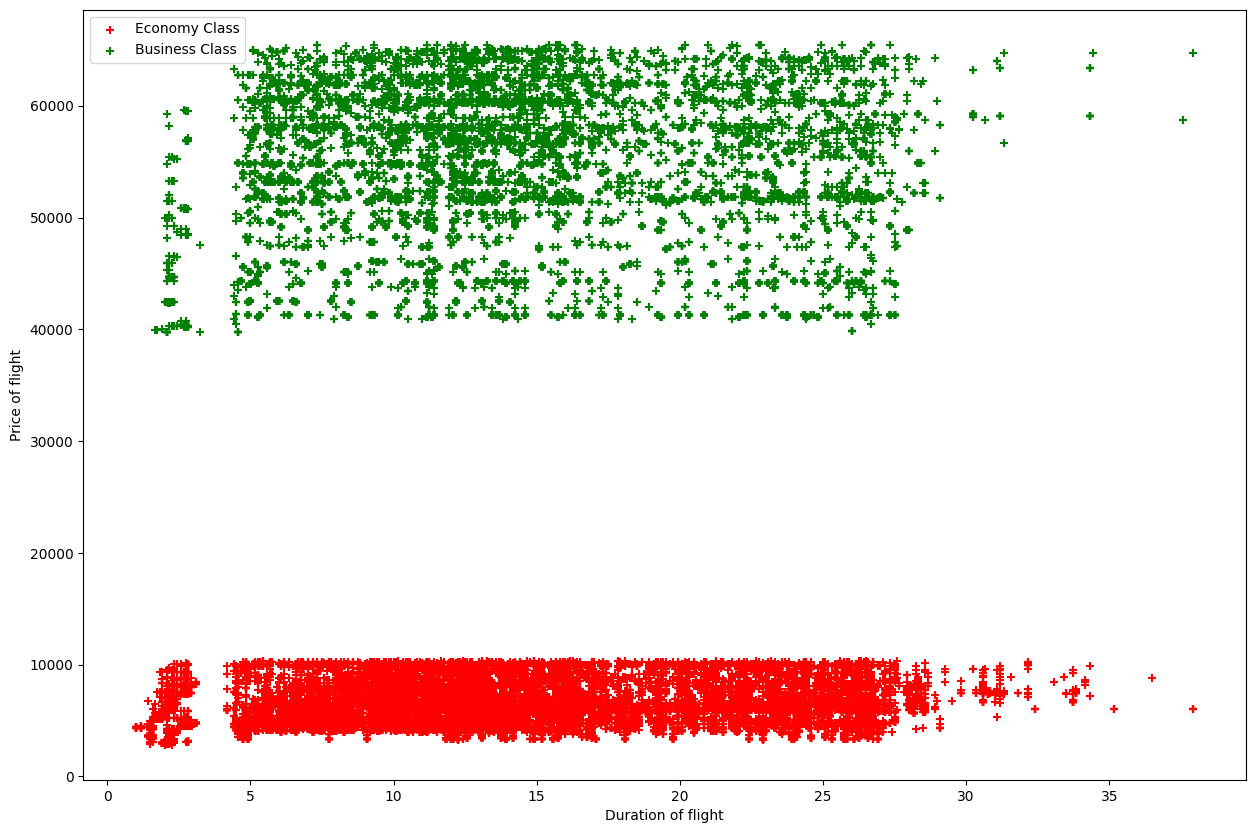

In [14]:
# plotting duration vs price with respect to class and airline
# here no outlier found
def plot_scatter(df,airline):
    eco=df[(df.airline==airline)&(df['class']=='Economy')]
    busi=df[(df.airline==airline)&(df['class']=='Business')]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(eco.duration,eco.price,color='red',marker='+',label='Economy Class')
    plt.scatter(busi.duration,busi.price,color='green',marker='+',label='Business Class')
    plt.xlabel("Duration of flight")
    plt.ylabel("Price of flight")
    plt.legend()
plot_scatter(final,'Vistara')

In [15]:
final['class']

0         Business
1         Business
2         Business
3         Business
4         Business
            ...   
223071     Economy
223072     Economy
223073     Economy
223074     Economy
223075     Economy
Name: class, Length: 223076, dtype: object

## Catagorizing Encoding

In [16]:
final_2=final

In [17]:
# encoding airline
dummies=pd.get_dummies(final.airline).astype(int)
dummies=dummies.drop('Vistara',axis='columns')
dummies

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
223071,0,0,0,0,0
223072,0,0,0,0,0
223073,0,0,0,0,0
223074,0,0,0,0,0


In [18]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,0,1,0,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,0,1,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,0,1,0,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,0,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,0,0,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,0,0,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,0,0,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,0,0,0,0,0


In [19]:
# encoding departure time
dummies=pd.get_dummies(final.departure_time).astype(int)
dummies=dummies.drop('Night',axis='columns')
dummies

,Afternoon,Early_Morning,Evening,Late_Night,Morning
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,0
...,...,...,...,...,...
223071,0,1,0,0,0
223072,0,1,0,0,0
223073,1,0,0,0,0
223074,0,0,0,0,1


In [20]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Afternoon,Early_Morning,Evening,Late_Night,Morning
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,0,1,0,0,0,0,0,1,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,0,1,0,0,0,0,0,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,0,1,0,0,0,0,0,1,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,0,0,0,0,0,0,0,1,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,0,0,0,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,0,0,0,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,0,0,0,0,0,1,0,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,0,0,0,0,0,0,0,0,0,1


In [21]:
# encoding source_city
dummies=pd.get_dummies(final.source_city).astype(int)
dummies=dummies.drop('Mumbai',axis='columns')
dummies

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
223071,0,1,0,0,0
223072,0,1,0,0,0
223073,0,1,0,0,0
223074,0,1,0,0,0


In [22]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Afternoon,Early_Morning,Evening,Late_Night,Morning,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,1,0,0,0,0,1,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,0,0,0,0,0,1,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,1,0,0,0,0,1,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,1,0,0,0,0,1,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,1,0,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,1,0,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,1,0,0,0,0,0,1,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,0,0,1,0,1,0,0,0


In [23]:
# encoding destination
dummies=pd.get_dummies(final.source_city).astype(int)
dummies=dummies.drop('Mumbai',axis='columns')
dummies

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
223071,0,1,0,0,0
223072,0,1,0,0,0
223073,0,1,0,0,0
223074,0,1,0,0,0


In [24]:
#changing col names as source destination same names
dummies=dummies.rename(columns={"Bangalore": "Bangalore_d", "Chennai": "Chennai_d","Delhi":"Delhi_d","Hyderabad":"Hyderabad_d","Kolkata":"Kolkata_d"})

In [25]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Bangalore_d,Chennai_d,Delhi_d,Hyderabad_d,Kolkata_d
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,1,0,0,0,0,1,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,1,0,0,0,0,1,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,1,0,0,0,0,1,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,1,0,0,0,0,1,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,1,0,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,1,0,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,1,0,0,0,0,1,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,1,0,0,0,0,1,0,0,0


In [26]:
# encoding stops
dummies=pd.get_dummies(final.stops).astype(int)
dummies=dummies.drop('zero',axis='columns')
dummies

,one,two_or_more
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
223071,1,0
223072,1,0
223073,1,0
223074,1,0


In [27]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Delhi,Hyderabad,Kolkata,Bangalore_d,Chennai_d,Delhi_d,Hyderabad_d,Kolkata_d,one,two_or_more
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,1,0,0,0,0,1,0,0,1,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,1,0,0,0,0,1,0,0,1,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,1,0,0,0,0,1,0,0,1,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,1,0,0,0,0,1,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,0,0,1,0,0,0,1,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,0,0,1,0,0,0,1,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,0,0,1,0,0,0,1,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# arrival_time
dummies=pd.get_dummies(final.arrival_time).astype(int)
dummies=dummies.drop('Night',axis='columns')
dummies

,Afternoon,Early_Morning,Evening,Late_Night,Morning
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
223071,0,0,0,0,0
223072,0,0,0,0,0
223073,0,0,0,0,1
223074,0,0,0,0,1


In [29]:
#changing names of cols
dummies=dummies.rename(columns={"Afternoon": "ar_Afternoon", "Early_Morning": "ar_Early_Morning","Evening":"ar_Evening","Late_Night":"ar_Late_Night","Morning":"ar_Morning"})

In [30]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Delhi_d,Hyderabad_d,Kolkata_d,one,two_or_more,ar_Afternoon,ar_Early_Morning,ar_Evening,ar_Late_Night,ar_Morning
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,1,0,0,1,0,0,0,0,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,1,0,0,1,0,0,0,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,1,0,0,1,0,0,0,0,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,1,0,0,0,0,0,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,0,1,0,0,0,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,0,1,0,0,0,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,0,1,0,0,0,0,0,1
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,0,1,0,0,0,0,0,1


In [31]:
# class
dummies=pd.get_dummies(final['class']).astype(int)
dummies=dummies.drop('Economy',axis='columns')
dummies

,Business
0,1
1,1
2,1
3,1
4,1
...,...
223071,0
223072,0
223073,0
223074,0


In [32]:
final=pd.concat([final,dummies],axis='columns')
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Hyderabad_d,Kolkata_d,one,two_or_more,ar_Afternoon,ar_Early_Morning,ar_Evening,ar_Late_Night,ar_Morning,Business
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,1,0,0,0,0,0,0,1
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,1,0,0,0,0,0,0,1
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,1,0,0,0,0,0,0,1
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,0,0,0,0,0,0,0,1
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,1,0,0,0,0,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,1,0,0,0,0,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,1,0,0,0,0,0,1,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,1,0,0,0,0,0,1,0


In [33]:
final=final.iloc[:,7:]
final

,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Afternoon,Early_Morning,...,Hyderabad_d,Kolkata_d,one,two_or_more,ar_Afternoon,ar_Early_Morning,ar_Evening,ar_Late_Night,ar_Morning,Business
0,24.75,1,42220,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,26.50,1,44450,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,6.67,1,46690,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.17,1,50264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17.75,1,50669,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,13.83,49,7697,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
223072,13.83,49,7709,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
223073,20.58,49,8640,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
223074,23.33,49,8640,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [34]:
final.shape

(223076, 31)

## Model

In [35]:
x=final.drop(['price','duration'],axis='columns')
x

,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Afternoon,Early_Morning,Evening,Late_Night,...,Hyderabad_d,Kolkata_d,one,two_or_more,ar_Afternoon,ar_Early_Morning,ar_Evening,ar_Late_Night,ar_Morning,Business
0,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,49,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
223072,49,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
223073,49,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
223074,49,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
y=final.price
y

0         42220
1         44450
2         46690
3         50264
4         50669
          ...  
223071     7697
223072     7709
223073     8640
223074     8640
223075     8640
Name: price, Length: 223076, dtype: int64

In [37]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9733187105443742

## K fold Cross Validation to know which parameters to use and which algo best

In [39]:
# ShuffleSplit randomize the sample so that each of folds has equal distribution
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X_train,y_train,cv=cv)
# for linear regression we get score of each folds above 80%

array([0.97336627, 0.97358882, 0.97370417, 0.97350005, 0.97303293])

In [40]:
# lets try other algos as well
# decission regressor is like decission classifier but it predicts neumeric data and takes neumeric data

from sklearn.tree import DecisionTreeRegressor
# finding best model using grid search cv

def find_best_model_using_gridsearchcv(X_train,y_train):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
            
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({

            'model':algo_name,

            'best_score':gs.best_score_,

            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py", 

,model,best_score,best_params
0,linear_regression,0.973438,{}
1,lasso,0.973437,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.973100,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [41]:
# Decision tree
dtr_clf=DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
dtr_clf.fit(X_train,y_train)
dtr_clf.score(X_test,y_test)

0.9741319082034487

**as linear regression is best model so well use that**

## Price Prediction

In [42]:
final_2.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [43]:
x.columns

Index(['days_left', 'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Bangalore_d',
       'Chennai_d', 'Delhi_d', 'Hyderabad_d', 'Kolkata_d', 'one',
       'two_or_more', 'ar_Afternoon', 'ar_Early_Morning', 'ar_Evening',
       'ar_Late_Night', 'ar_Morning', 'Business'],
      dtype='object')

In [44]:
np.where(x.columns=='SpiceJet')[0][0]

5

In [45]:
np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# here we are considering the columns of each catagoricl x and making it to 1 and each neumeric cols are stored
# as its name as index of catagorical x cols are > 0 they are being 1 so in all 0 array
# if spice jet found then [00001000] like that this way we are encoding for each found vallues of cols and predicting
# if any col not found that is dropped col such as Night in this case was dropped then , if all cols ar 0 tht is night thus we need
# to write exception where if index error comes then we dont encode n keep 0
def predict_price(arr, days_left):
#     arr=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
#     'destination_city', 'class']
    x1=np.zeros(len(x.columns))
    x1[0]=days_left
    for i in arr:
        try:
            loc_index=np.where(x.columns==i)[0][0]
        except IndexError:
            loc_index=-1
        if loc_index>=0:
            x1[loc_index]=1
    return dtr_clf.predict([x1])[0]



In [48]:
predict_price(['Indigo','Chennai','Early_Morning','one','ar_Night','Hyderabad_d','Economy'],20)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


6133.0

In [49]:
X_train

,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Afternoon,Early_Morning,Evening,Late_Night,...,Hyderabad_d,Kolkata_d,one,two_or_more,ar_Afternoon,ar_Early_Morning,ar_Evening,ar_Late_Night,ar_Morning,Business
206609,26,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130060,45,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21294,22,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
97523,31,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
110586,38,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118242,44,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
47937,14,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
62665,29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
13239,21,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [50]:
dtr_clf.predict(X_test)

array([ 4969.18181818,  6964.27272727,  6032.        , ...,
        5446.1       ,  5292.        , 50281.        ])

In [51]:
from sklearn.metrics import *
mse_lr=mean_squared_error(y_test,lr_clf.predict(X_test))
mse_dtr=mean_squared_error(y_test,dtr_clf.predict(X_test))

In [52]:
print(mse_lr)
print(mse_dtr)

13110593.459265813
12711006.178153178


## Storing Pickle file

In [53]:
import pickle
# wb write binary
with open('Flight_price_prediction_model.pickle','wb') as f:
    pickle.dump(dtr_clf,f)

In [54]:
# dumping the encoded columns
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))